In [1]:
import os
import sys
from os.path import join as pjoin
import numpy as np

import torch
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
data_dir = '/scratch/users/austin.zane/ucsf_fast/data/pilot_labeling/AnnotationData/MorisonPouchMasks_1-23'
sys.path.append('/accounts/campus/austin.zane/ucsf_fast')
from common.datasets import FASTDataset

In [3]:
from experiments.train import visualize_segmentation_overlay

In [4]:
custom_dataset = FASTDataset(data_dir=data_dir)
dataloader = DataLoader(custom_dataset, batch_size=1, shuffle=True)

In [5]:
for images, labels in dataloader:
    print(images.shape, labels.shape)
    train_img = images
    train_label = labels
    break

torch.Size([1, 1, 720, 960]) torch.Size([1, 1, 720, 960])


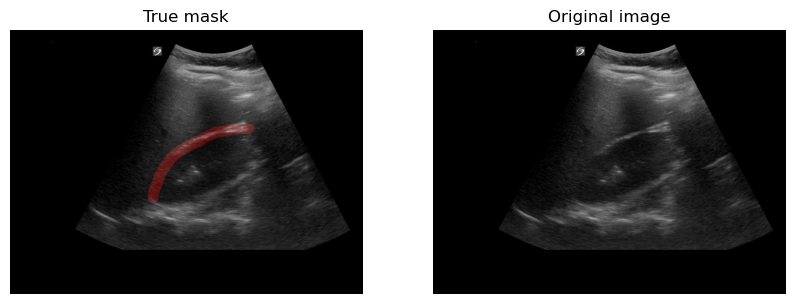

In [6]:
ex_image = train_img[0]
ex_label = train_label[0]

visualize_segmentation_overlay(ex_image, ex_label)